In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd


original_dataset = pd.read_csv('PIMA diabetes dataset.csv')
original_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset = original_dataset.copy()
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.rename(columns = {'DiabetesPedigreeFunction': 'DPF'},inplace = True)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

In [ ]:
import numpy as np

dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
isnull = dataset.isnull().sum()
display(isnull)

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome            0
dtype: int64

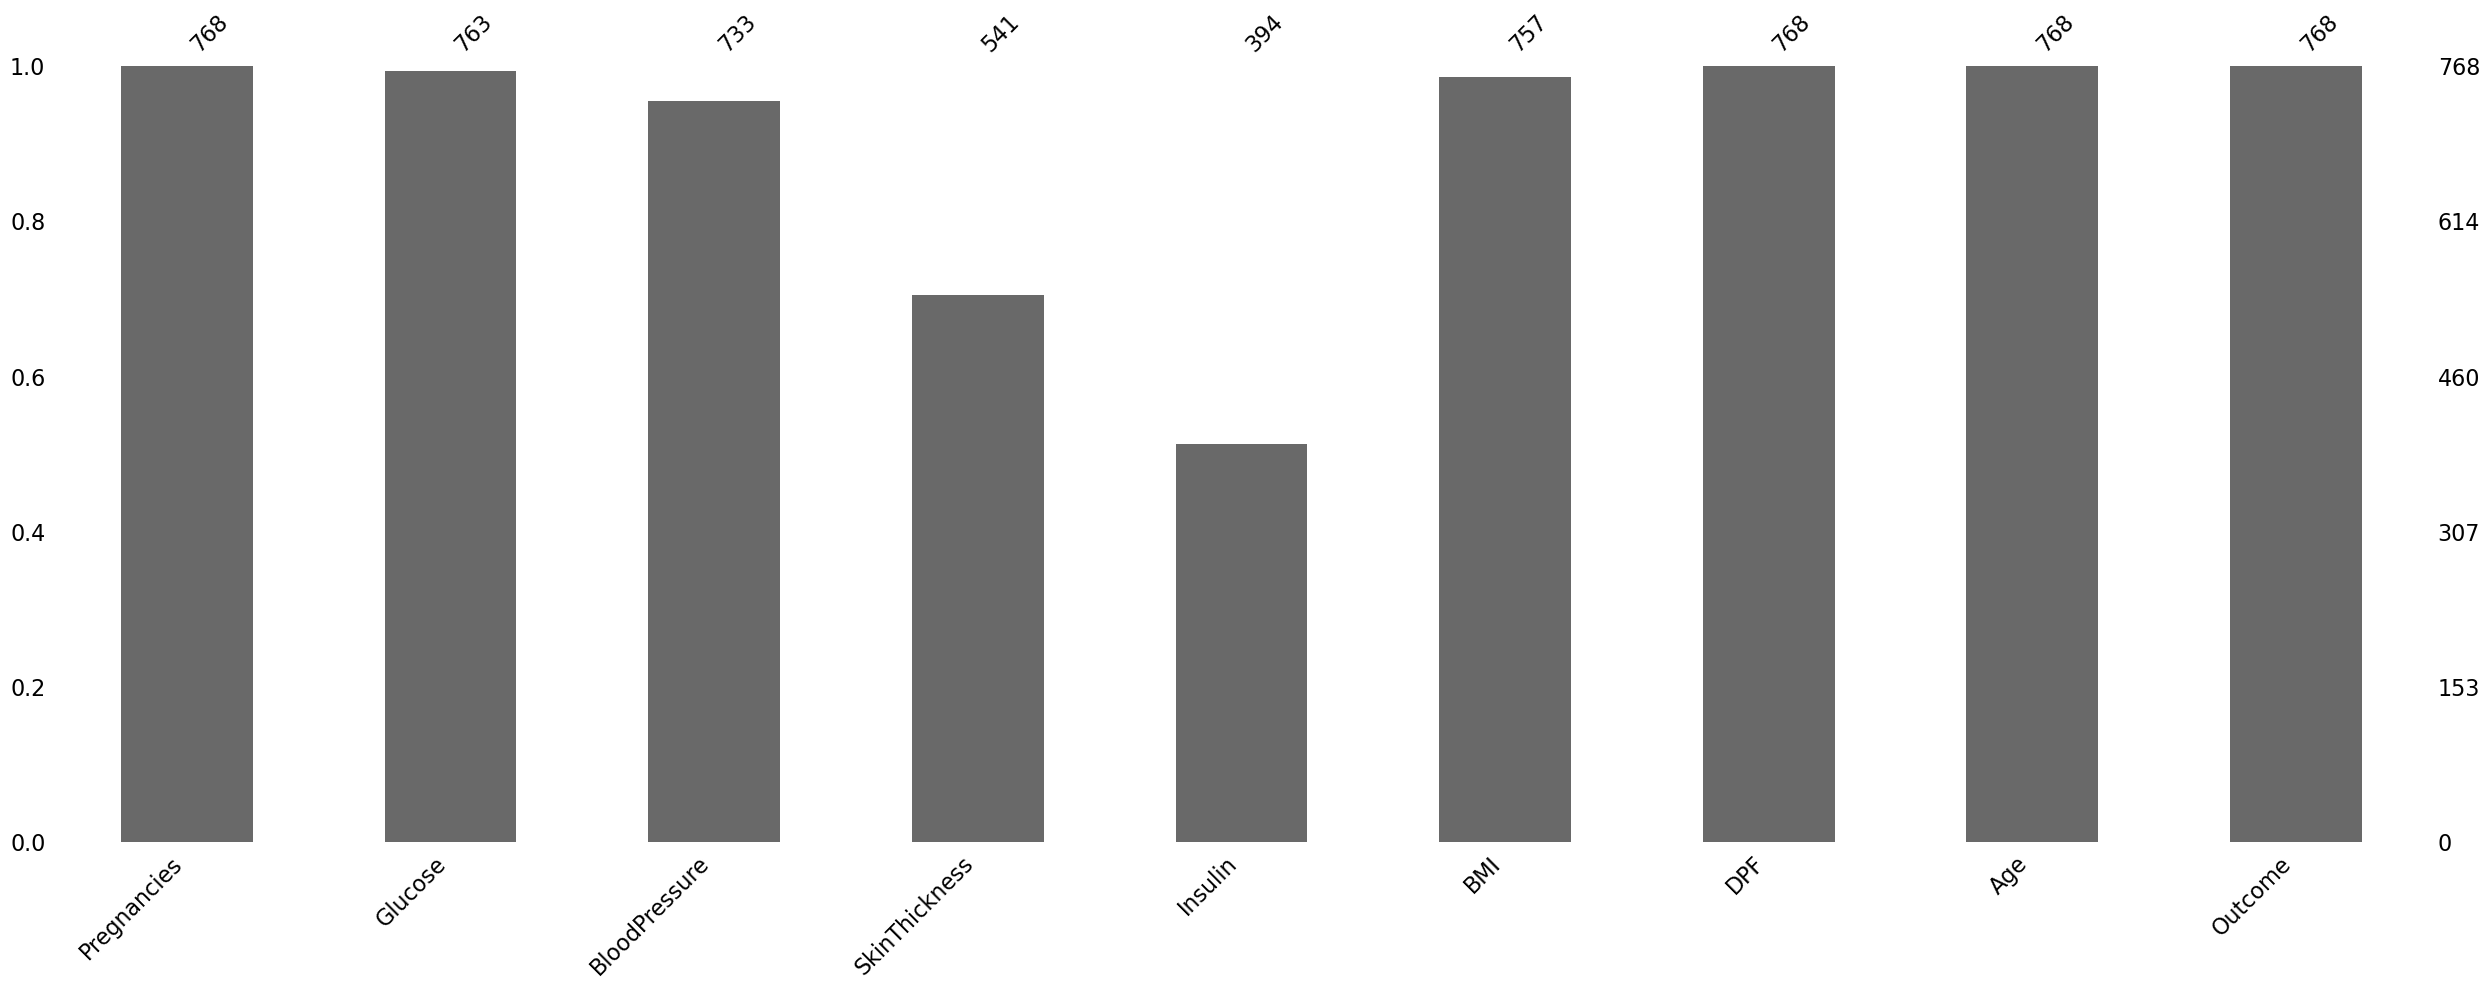

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# Your dataset should be defined here
# dataset = ...

# Create the missing values bar plot
msno.bar(dataset)

# Adjust layout to prevent title cutting
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('missing_values_plot.pdf')


In [ ]:
# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):
    temp = dataset[dataset[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [ ]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = dataset.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    dataset.loc[(dataset['Outcome'] == 0 ) & (dataset[i].isnull()), i] = median_target(i)[i][0]
    dataset.loc[(dataset['Outcome'] == 1 ) & (dataset[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
isnull = dataset.isnull().sum()
display(isnull)

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

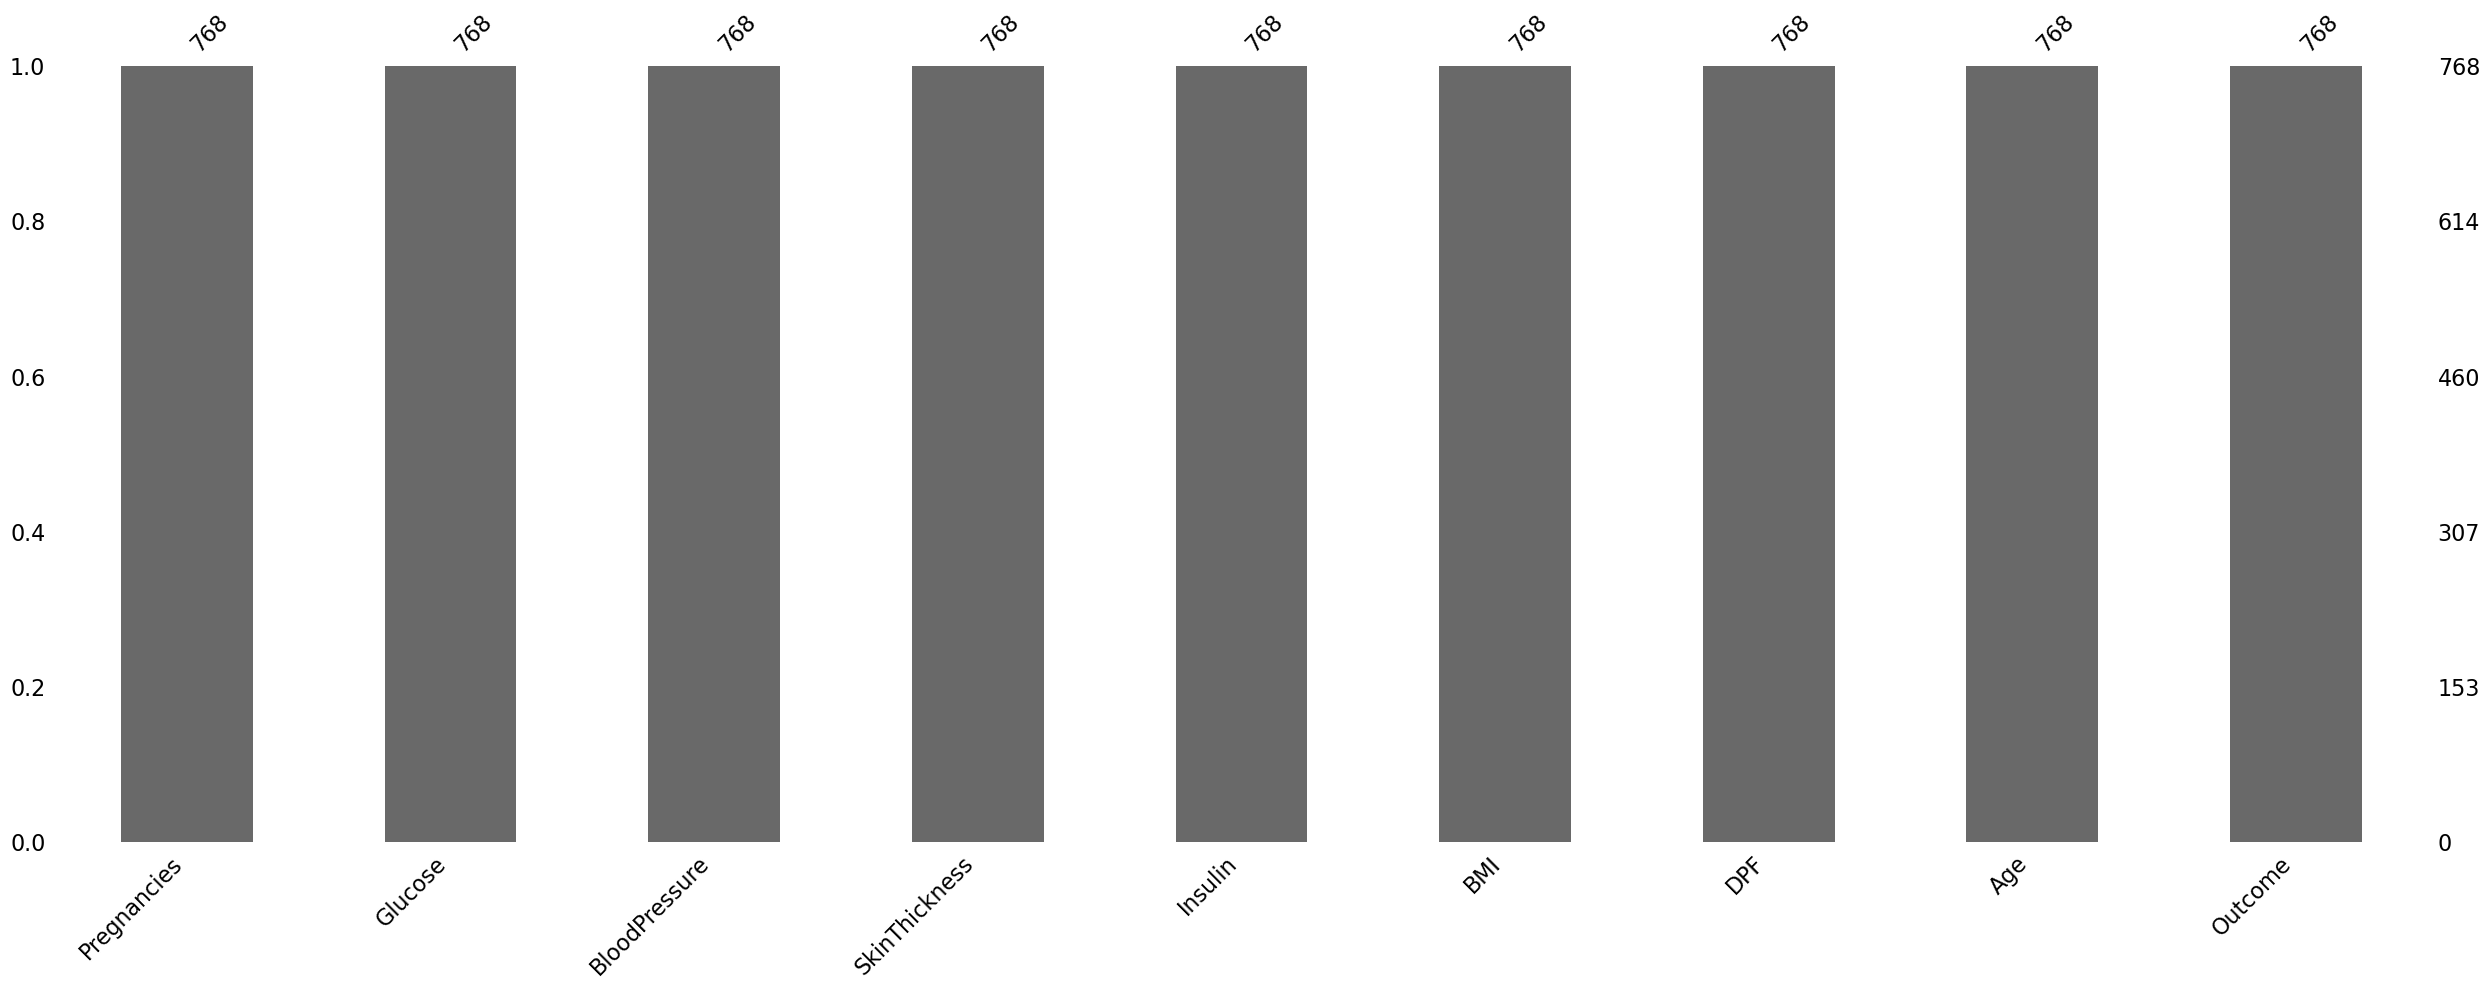

In [ ]:
# Have been visualized using the missingno library for the visualization for non missing observations.
# Plotting
import missingno as msno
msno.bar(dataset);

# Adjust layout to prevent title cutting
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('no_missing_values_plot.pdf')

In [ ]:
print(f"Number of duplicates: {dataset.duplicated().sum()}")

Number of duplicates: 0


In [ ]:
dataset.drop_duplicates(inplace = True)

In [ ]:
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
features = dataset.drop('Outcome', axis = 1)
outcome = dataset['Outcome']

print(f'Features: {features.shape}')
print(f'Outcome: {outcome.shape}')

Features: (768, 8)
Outcome: (768,)


In [ ]:
from collections import Counter
display(sorted(Counter(dataset['Outcome']).items()))

[(0, 500), (1, 268)]

In [ ]:
# Check for missing values in 'outcome'
print(f"Number of missing values in 'outcome': {outcome.isnull().sum()}")

Number of missing values in 'outcome': 0


In [ ]:
# Option 1: Remove rows with missing values (consider alternative imputation methods if needed)
outcome = outcome.dropna()
features = features.dropna()

# Now you can use the cleaned 'outcome' and 'capped_data' for training

In [ ]:
# Check for missing values in 'outcome'
print(f"Number of missing values in 'outcome': {outcome.isnull().sum()}")

Number of missing values in 'outcome': 0


In [ ]:
import pandas as pd

check_null_values = pd.DataFrame(features)
zeros_count = check_null_values.eq(0).sum()


print("Number of zeros in each column:")
display(zeros_count)

Number of zeros in each column:


Pregnancies      111
Glucose            0
BloodPressure      0
SkinThickness      0
Insulin            0
BMI                0
DPF                0
Age                0
dtype: int64

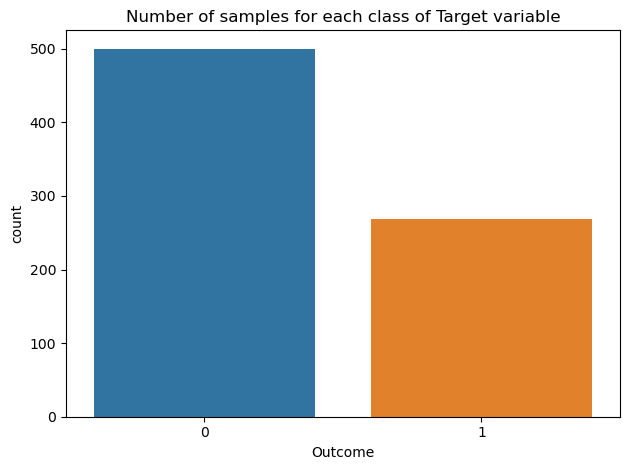

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# let's visualise the number of samples for each class with count plot
sns.countplot(x = dataset['Outcome'])
plt.title("Number of samples for each class of Target variable");

plt.tight_layout()

plt.savefig('no_of_sample_for_each_class_target_value.pdf')

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Check the data types of columns in the dataset
display(dataset.dtypes)

Pregnancies        int64
Glucose          float64
BloodPressure    float64
SkinThickness    float64
Insulin          float64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
dtype: object

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the features
# Convert categorical features to numerical values
numerical_features = pd.get_dummies(features)

In [ ]:
# Check the data types of columns in the dataset
display(dataset.dtypes)

Pregnancies        int64
Glucose          float64
BloodPressure    float64
SkinThickness    float64
Insulin          float64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
dtype: object

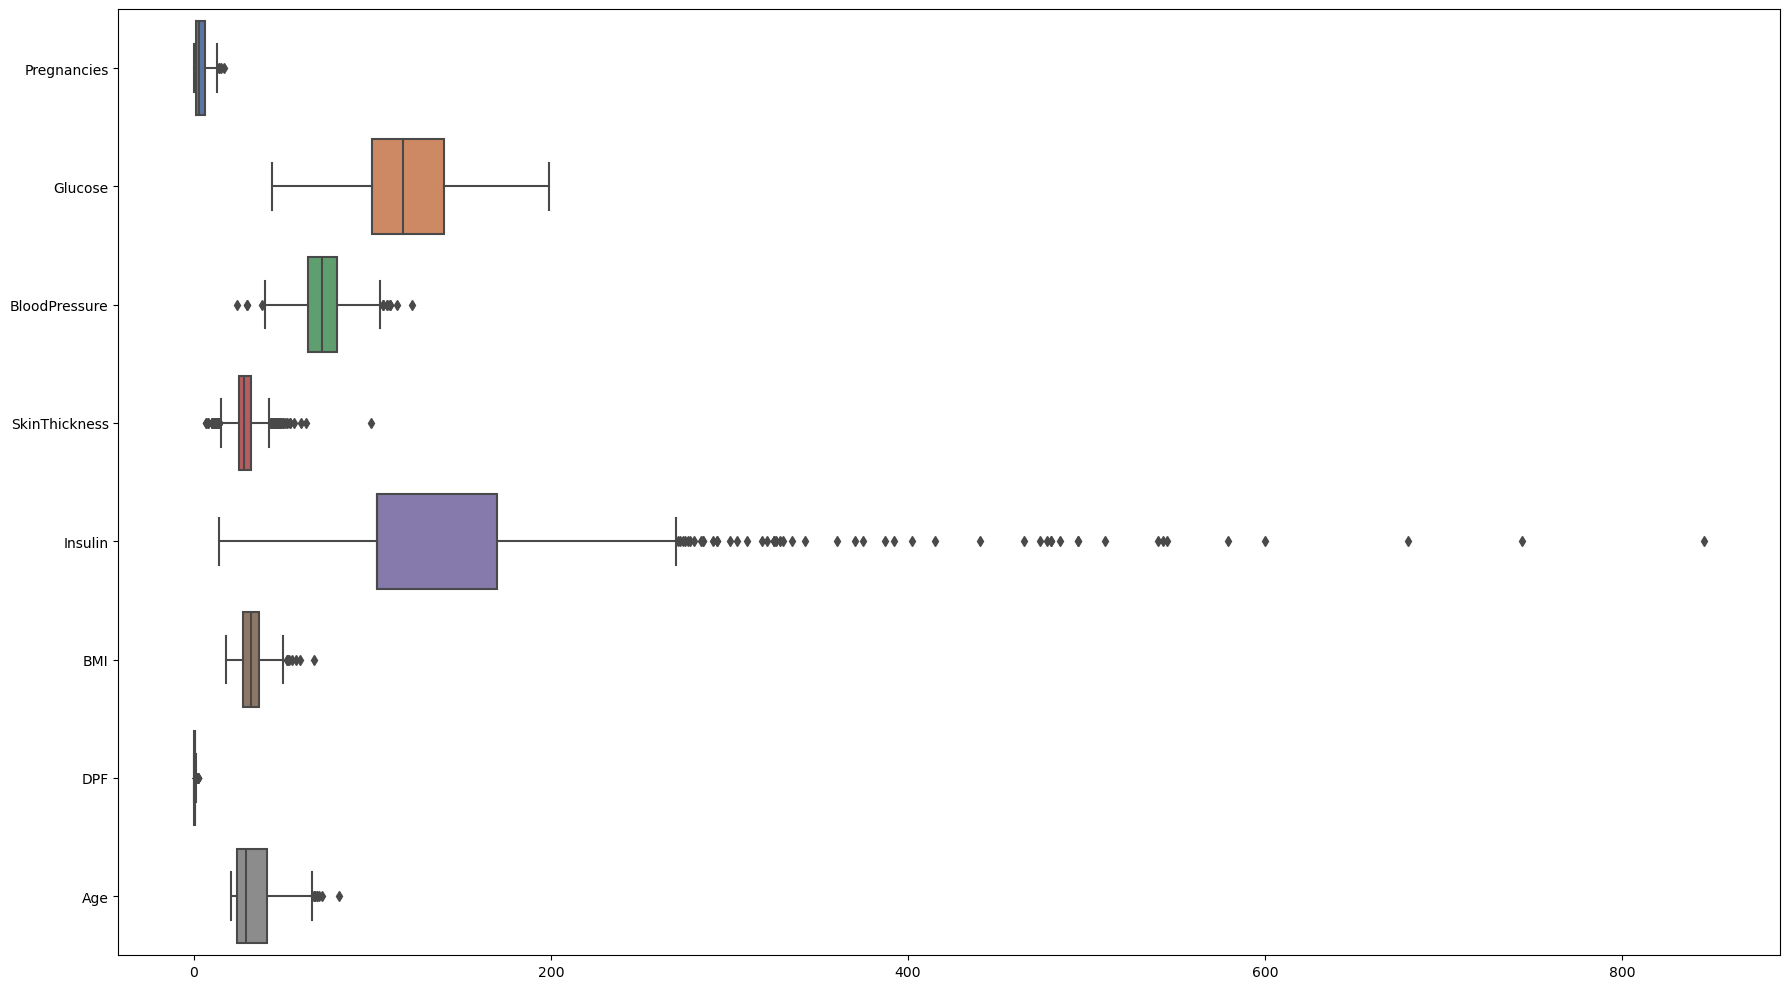

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier Detection
# Boxplot for each attribute
plt.figure(figsize=(18,10))
sns.boxplot(data=features, orient="h", palette="deep")

# Adjust layout to prevent title cutting
plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('outliers_finding.pdf')

In [ ]:
import pandas as pd

# Define the function to cap outliers using IQR method
def cap_outliers_iqr(features, factor=1.5):
    """
    Caps outliers in a DataFrame using the Interquartile Range (IQR) method
    for all numerical columns.

    Args:
        features (pd.DataFrame): The DataFrame containing potentially outlier-ridden columns.
        factor (float): Multiplier for the IQR. Default is 1.5.

    Returns:
        pd.DataFrame: The DataFrame with outliers in all numerical columns capped.
    """
    capped_data = features.copy()

    for col in capped_data.columns:
        q1 = capped_data[col].quantile(0.25)
        q3 = capped_data[col].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - factor * iqr
        upper_bound = q3 + factor * iqr

        # Cap the outliers
        capped_data[col] = capped_data[col].clip(lower_bound, upper_bound)

    return capped_data

# Assuming you have already loaded and preprocessed your dataset

# Apply the function to cap outliers using IQR method
capped_data = cap_outliers_iqr(features.copy())



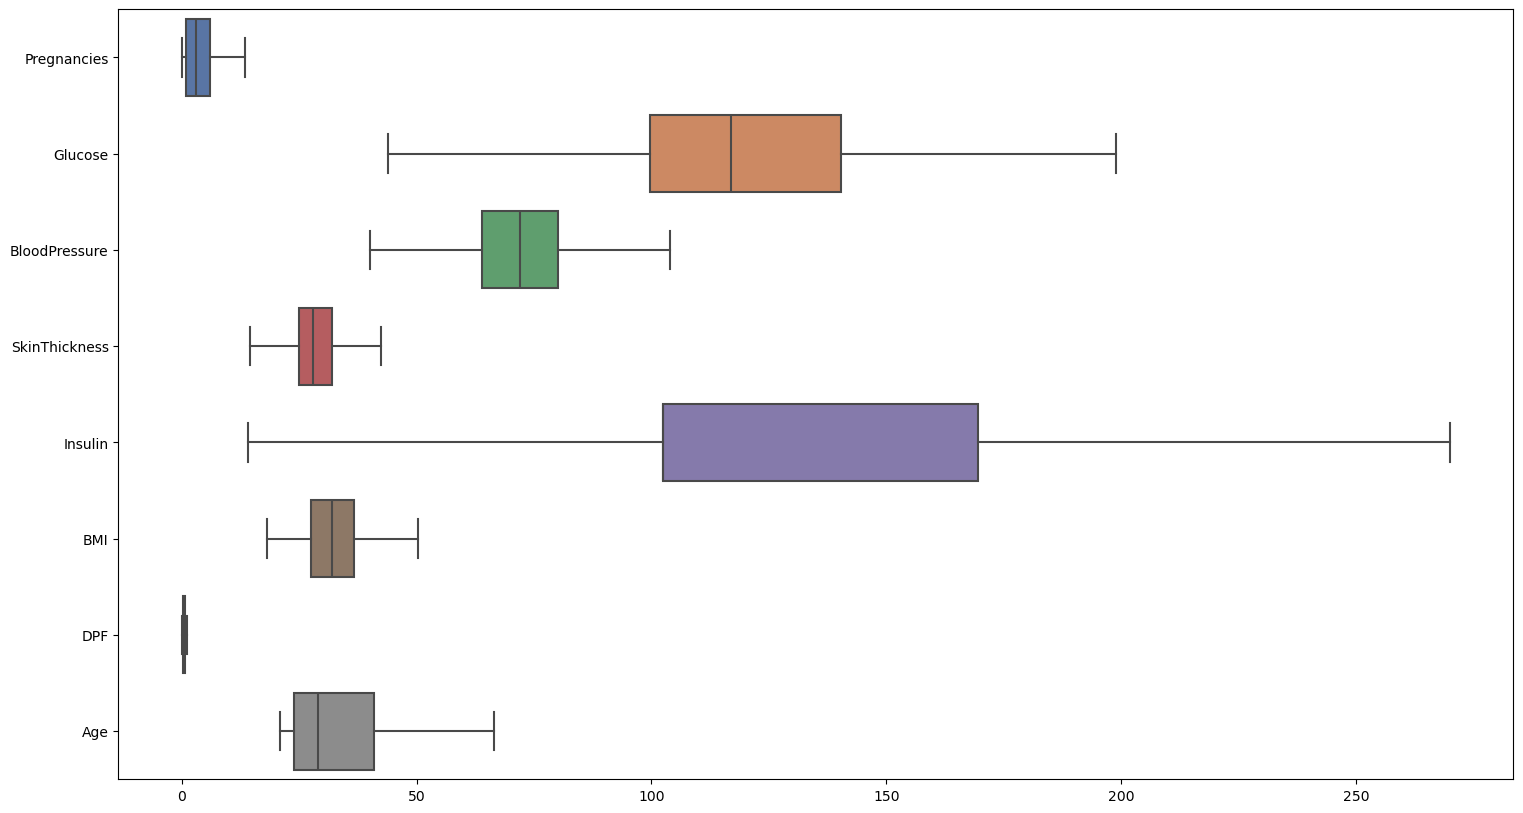

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier Detection
# Boxplot for each attribute
plt.figure(figsize=(18,10))
sns.boxplot(data=capped_data, orient="h", palette="deep")
# # Adjust layout to prevent title cutting
# plt.tight_layout()

# Save the plot as a PDF file
plt.savefig('capped_outlier_boxplot.pdf')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'features' is your DataFrame containing the features
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature data
scaled_features = scaler.fit_transform(capped_data)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=capped_data.columns)

# Display the standardized features
# print("Standardized features:")
# print(scaled_features_df)


In [ ]:
capped_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0


In [ ]:
# Assuming 'capped_data' is your DataFrame containing the features
capped_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Age']] = capped_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Age']].astype('int64')

# Check the data types of columns after conversion
display(capped_data.dtypes)


Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin          float64
BMI              float64
DPF              float64
Age                int64
dtype: object

In [ ]:
capped_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,6,148,72,35,169.5,33.6,0.627,50
1,1,85,66,29,102.5,26.6,0.351,31
2,8,183,64,32,169.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,1.200,33


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert 'outcome' to a pandas Series
outcome_series = pd.Series(outcome)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable 'outcome'
encoded_outcome = label_encoder.fit_transform(outcome_series)

# Replace 'outcome' with the encoded values
outcome_series_encoded = pd.Series(encoded_outcome, name='Outcome')

# # Verify the encoded labels
# print(outcome_series_encoded)

outcome = outcome_series_encoded.copy()



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# ***Model Training with default Parameter and Technique + Boosting Techniques***

In [ ]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier  # Import LGBM classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd
import time

# Load and preprocess data
# Assuming scaled_features_df and outcome are defined previously

# Set random seed for reproducibility
np.random.seed(42)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LightGBM': LGBMClassifier()  # Add LGBM classifier
}

# Define different numbers of folds
fold_settings = [3, 5, 10]

# Initialize dictionaries to store results
results = {}
best_result = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'auc': 0}
best_model = ''

# Perform cross-validation for each classifier and fold setting
for clf_name, clf in classifiers.items():
    print(f"<--------------------------------------------------{clf_name}-------------------------->")
    results[clf_name] = {}
    best_fold_result = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'auc': 0}
    best_fold = 0
    for folds in fold_settings:
        print(f"<--------------------------------------------------{folds}-Fold-------------------------->")

        # Measure start time for the current fold
        start_fold_time = time.time()

        # Initialize StratifiedKFold with shuffle and random_state
        skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

        # Perform cross-validation
        cv_results = cross_validate(clf, scaled_features_df, outcome, cv=skf,
                                    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                                    return_train_score=False)

        # Measure end time for the current fold
        end_fold_time = time.time()
        fold_execution_time = end_fold_time - start_fold_time

        # Extract evaluation metrics
        mean_accuracy = cv_results['test_accuracy'].mean()
        mean_precision = cv_results['test_precision'].mean()
        mean_recall = cv_results['test_recall'].mean()
        mean_f1 = cv_results['test_f1'].mean()
        mean_auc = cv_results['test_roc_auc'].mean()

        # Store results
        results[clf_name][folds] = {'accuracy': mean_accuracy,
                                    'precision': mean_precision,
                                    'recall': mean_recall,
                                    'f1': mean_f1,
                                    'auc': mean_auc}

        # Check if current fold setting yields the best result for this classifier
        if mean_accuracy > best_result['accuracy']:
            best_result = {'accuracy': mean_accuracy,
                           'precision': mean_precision,
                           'recall': mean_recall,
                           'f1': mean_f1,
                           'auc': mean_auc}
            best_model = clf_name

        # Check if current fold is the best fold for this classifier
        if mean_accuracy > best_fold_result['accuracy']:
            best_fold_result = {'accuracy': mean_accuracy,
                                'precision': mean_precision,
                                'recall': mean_recall,
                                'f1': mean_f1,
                                'auc': mean_auc}
            best_fold = folds

        # Print results for the current fold setting
        print(f"{folds}-Fold Cross-Validation:")
        print("Mean Accuracy: {:.2f}%".format(mean_accuracy * 100))
        print("Mean Precision: {:.2f}%".format(mean_precision * 100))
        print("Mean Recall: {:.2f}%".format(mean_recall * 100))
        print("Mean F1 Score: {:.2f}%".format(mean_f1 * 100))
        print("Mean AUC: {:.2f}%".format(mean_auc * 100))
        print(f"Time taken: {int(fold_execution_time // 60)} min {int(fold_execution_time % 60)} sec")
        print()

    # Print the best fold for this classifier
    print(f"<------------------Best Fold for {clf_name}------------------>")
    print(f"Best Fold: {best_fold}-Fold")
    print("Best Fold Result:")
    print(f"Mean Accuracy: {best_fold_result['accuracy'] * 100:.2f}%")
    print(f"Mean Precision: {best_fold_result['precision'] * 100:.2f}%")
    print(f"Mean Recall: {best_fold_result['recall'] * 100:.2f}%")
    print(f"Mean F1 Score: {best_fold_result['f1'] * 100:.2f}%")
    print(f"Mean AUC: {best_fold_result['auc'] * 100:.2f}%")
    print("<------------------------------------------------------------->")
    print()

# Rank the models based on highest to lowest scorer
ranked_models = sorted([(model, max(results[model], key=lambda x: results[model][x]['accuracy'])) for model in results], key=lambda x: results[x[0]][x[1]]['accuracy'], reverse=True)

# Print the ranked models
print("<-----------------------------------Ranked Models----------------------------------->")
for idx, (model, fold) in enumerate(ranked_models):
    print(f"{idx + 1}. {model}: {results[model][fold]['accuracy'] * 100:.2f}% (Best at {fold}-Fold)")


# Print the best performing model and its result
print("<-----------------------------------Best Performing Model----------------------------------->")
print(f"Best performing model: {best_model}")
print("Best result:")
print(f"Mean Accuracy: {best_result['accuracy'] * 100:.2f}%")
print(f"Mean Precision: {best_result['precision'] * 100:.2f}%")
print(f"Mean Recall: {best_result['recall'] * 100:.2f}%")
print(f"Mean F1 Score: {best_result['f1'] * 100:.2f}%")
print(f"Mean AUC: {best_result['auc'] * 100:.2f}%")


<--------------------------------------------------Logistic Regression-------------------------->
<--------------------------------------------------3-Fold-------------------------->
3-Fold Cross-Validation:
Mean Accuracy: 80.08%
Mean Precision: 74.81%
Mean Recall: 65.30%
Mean F1 Score: 69.54%
Mean AUC: 87.44%
Time taken: 0 min 0 sec

<--------------------------------------------------5-Fold-------------------------->
5-Fold Cross-Validation:
Mean Accuracy: 80.86%
Mean Precision: 76.51%
Mean Recall: 65.68%
Mean F1 Score: 70.55%
Mean AUC: 87.54%
Time taken: 0 min 0 sec

<--------------------------------------------------10-Fold-------------------------->
10-Fold Cross-Validation:
Mean Accuracy: 80.47%
Mean Precision: 75.74%
Mean Recall: 64.94%
Mean F1 Score: 69.62%
Mean AUC: 87.71%
Time taken: 0 min 0 sec

<------------------Best Fold for Logistic Regression------------------>
Best Fold: 5-Fold
Best Fold Result:
Mean Accuracy: 80.86%
Mean Precision: 76.51%
Mean Recall: 65.68%
Mean F1 Sc

# **Model Training with Hybrid Class Balance Technique SMOTETOMEK**

In [ ]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np
import pandas as pd
import time

# Set random seed for reproducibility
np.random.seed(42)

# Load and preprocess data
# Assuming scaled_features_df and outcome are defined previously

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LGBM': LGBMClassifier()
}

# Define different numbers of folds
fold_settings = [10]

# Initialize dictionaries to store results
results = {}
best_result = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'auc': 0}
best_model = ''

# SMOTETomek
smote_tomek = SMOTETomek(random_state=42)

# Perform cross-validation for each classifier and fold setting
for clf_name, clf in classifiers.items():
    print(f"<--------------------------------------------------{clf_name}-------------------------->")
    results[clf_name] = {}
    best_fold_result = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'auc': 0}
    best_fold = 0
    for folds in fold_settings:
        print(f"<--------------------------------------------------{folds}-Fold-------------------------->")

        # Perform SMOTETomek resampling
        features_resampled, outcome_resampled = smote_tomek.fit_resample(scaled_features_df, outcome)

        # Initialize StratifiedKFold with fixed random state
        skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

        # Perform cross-validation
        cv_results = cross_validate(clf, features_resampled, outcome_resampled, cv=skf,
                                    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                                    return_train_score=False)


        # Extract evaluation metrics
        mean_accuracy = cv_results['test_accuracy'].mean()
        mean_precision = cv_results['test_precision'].mean()
        mean_recall = cv_results['test_recall'].mean()
        mean_f1 = cv_results['test_f1'].mean()
        mean_auc = cv_results['test_roc_auc'].mean()

        # Store results
        results[clf_name][folds] = {'accuracy': mean_accuracy,
                                    'precision': mean_precision,
                                    'recall': mean_recall,
                                    'f1': mean_f1,
                                    'auc': mean_auc}

        # Check if current fold setting yields the best result for this classifier
        if mean_accuracy > best_result['accuracy']:
            best_result = {'accuracy': mean_accuracy,
                           'precision': mean_precision,
                           'recall': mean_recall,
                           'f1': mean_f1,
                           'auc': mean_auc}
            best_model = clf_name

        # Check if current fold is the best fold for this classifier
        if mean_accuracy > best_fold_result['accuracy']:
            best_fold_result = {'accuracy': mean_accuracy,
                                'precision': mean_precision,
                                'recall': mean_recall,
                                'f1': mean_f1,
                                'auc': mean_auc}
            best_fold = folds

        # Print results for the current fold setting
        print(f"{folds}-Fold Cross-Validation:")
        print("Mean Accuracy: {:.2f}%".format(mean_accuracy * 100))
        print("Mean Precision: {:.2f}%".format(mean_precision * 100))
        print("Mean Recall: {:.2f}%".format(mean_recall * 100))
        print("Mean F1 Score: {:.2f}%".format(mean_f1 * 100))
        print("Mean AUC: {:.2f}%".format(mean_auc * 100))
        print(f"Time taken: {int(fold_execution_time // 60)} min {int(fold_execution_time % 60)} sec")
        print()

# Print the best performing model and its result
print("<-----------------------------------Best Performing Model----------------------------------->")
print(f"Best performing model: {best_model}")
print("Best result:")
print(f"Mean Accuracy: {best_result['accuracy'] * 100:.2f}%")
print(f"Mean Precision: {best_result['precision'] * 100:.2f}%")
print(f"Mean Recall: {best_result['recall'] * 100:.2f}%")
print(f"Mean F1 Score: {best_result['f1'] * 100:.2f}%")
print(f"Mean AUC: {best_result['auc'] * 100:.2f}%")


<--------------------------------------------------Logistic Regression-------------------------->
<--------------------------------------------------10-Fold-------------------------->
10-Fold Cross-Validation:
Mean Accuracy: 82.69%
Mean Precision: 81.63%
Mean Recall: 84.51%
Mean F1 Score: 83.00%
Mean AUC: 89.01%
Time taken: 0 min 2 sec

<--------------------------------------------------Decision Tree-------------------------->
<--------------------------------------------------10-Fold-------------------------->
10-Fold Cross-Validation:
Mean Accuracy: 87.98%
Mean Precision: 88.03%
Mean Recall: 88.19%
Mean F1 Score: 88.02%
Mean AUC: 87.98%
Time taken: 0 min 2 sec

<--------------------------------------------------Random Forest-------------------------->
<--------------------------------------------------10-Fold-------------------------->
10-Fold Cross-Validation:
Mean Accuracy: 91.85%
Mean Precision: 90.62%
Mean Recall: 93.47%
Mean F1 Score: 92.00%
Mean AUC: 96.98%
Time taken: 0 min 2 

In [ ]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Load and preprocess data
# Assuming scaled_features_df and outcome are defined previously

# Apply MinMaxScaler to ensure features are non-negative
scaler = MinMaxScaler()
features_non_negative = scaler.fit_transform(scaled_features_df)

# Apply SelectKBest feature selection using Chi-Square method
k_best = SelectKBest(score_func=chi2, k=7)  # Select top 7 features
features_selected = k_best.fit_transform(features_non_negative, outcome)

# Get the selected feature indices and names
selected_feature_indices = k_best.get_support(indices=True)
selected_feature_names = scaled_features_df.columns[selected_feature_indices]

# Define classifiers with modified LightGBM
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),  # Suppress LightGBM logs
    'CatBoost': CatBoostClassifier(verbose=0)  # Suppress CatBoost logs
}

# Define different numbers of folds
fold_settings = [3, 5, 10]

# Initialize dictionaries to store results
results = {}
best_result = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'auc': 0}
best_model = ''

# SMOTETomek
smote_tomek = SMOTETomek(random_state=42)

# Initialize lists to store accuracies and models
accuracy_values = []
model_names = []

# Perform cross-validation for each classifier and fold setting
for clf_name, clf in classifiers.items():
    print(f"<--------------------------------------------------{clf_name}-------------------------->")
    results[clf_name] = {}
    best_fold_result = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'auc': 0}
    best_fold = 0
    for folds in fold_settings:
        print(f"<--------------------------------------------------{folds}-Fold-------------------------->")

        # Perform SMOTETomek resampling
        features_resampled, outcome_resampled = smote_tomek.fit_resample(features_selected, outcome)

        # Initialize StratifiedKFold with fixed random state
        skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

        # Perform cross-validation
        cv_results = cross_validate(clf, features_resampled, outcome_resampled, cv=skf,
                                    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                                    return_train_score=False)


        # Extract evaluation metrics
        mean_accuracy = cv_results['test_accuracy'].mean()
        mean_precision = cv_results['test_precision'].mean()
        mean_recall = cv_results['test_recall'].mean()
        mean_f1 = cv_results['test_f1'].mean()
        mean_auc = cv_results['test_roc_auc'].mean()

        # Store results
        results[clf_name][folds] = {'accuracy': mean_accuracy,
                                    'precision': mean_precision,
                                    'recall': mean_recall,
                                    'f1': mean_f1,
                                    'auc': mean_auc}

        # Check if current fold setting yields the best result for this classifier
        if mean_accuracy > best_result['accuracy']:
            best_result = {'accuracy': mean_accuracy,
                           'precision': mean_precision,
                           'recall': mean_recall,
                           'f1': mean_f1,
                           'auc': mean_auc}
            best_model = clf_name

        # Check if current fold is the best fold for this classifier
        if mean_accuracy > best_fold_result['accuracy']:
            best_fold_result = {'accuracy': mean_accuracy,
                                'precision': mean_precision,
                                'recall': mean_recall,
                                'f1': mean_f1,
                                'auc': mean_auc}
            best_fold = folds

        # Print results for the current fold setting
        print(f"{folds}-Fold Cross-Validation:")
        print("Mean Accuracy: {:.2f}%".format(mean_accuracy * 100))
        print("Mean Precision: {:.2f}%".format(mean_precision * 100))
        print("Mean Recall: {:.2f}%".format(mean_recall * 100))
        print("Mean F1 Score: {:.2f}%".format(mean_f1 * 100))
        print("Mean AUC: {:.2f}%".format(mean_auc * 100))
        print(f"Time taken: {int(fold_execution_time // 60)} min {int(fold_execution_time % 60)} sec")
        print()

# Print the best performing model and its result
print("<-----------------------------------Best Performing Model----------------------------------->")
print(f"Best performing model: {best_model}")
print("Best result:")
print(f"Mean Accuracy: {best_result['accuracy'] * 100:.2f}%")
print(f"Mean Precision: {best_result['precision'] * 100:.2f}%")
print(f"Mean Recall: {best_result['recall'] * 100:.2f}%")
print(f"Mean F1 Score: {best_result['f1'] * 100:.2f}%")
print(f"Mean AUC: {best_result['auc'] * 100:.2f}%")

print("<------------------------------------------------------->")
print("Selected features:")
for feature in selected_feature_names:
    print(feature)


<--------------------------------------------------Logistic Regression-------------------------->
<--------------------------------------------------3-Fold-------------------------->
3-Fold Cross-Validation:
Mean Accuracy: 83.64%
Mean Precision: 82.13%
Mean Recall: 86.01%
Mean F1 Score: 84.02%
Mean AUC: 89.63%
Time taken: 0 min 2 sec

<--------------------------------------------------5-Fold-------------------------->
5-Fold Cross-Validation:
Mean Accuracy: 83.64%
Mean Precision: 82.13%
Mean Recall: 86.01%
Mean F1 Score: 84.01%
Mean AUC: 89.72%
Time taken: 0 min 2 sec

<--------------------------------------------------10-Fold-------------------------->
10-Fold Cross-Validation:
Mean Accuracy: 83.44%
Mean Precision: 81.93%
Mean Recall: 85.80%
Mean F1 Score: 83.75%
Mean AUC: 89.70%
Time taken: 0 min 2 sec

<--------------------------------------------------Decision Tree-------------------------->
<--------------------------------------------------3-Fold-------------------------->
3-Fold

In [ ]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Load and preprocess data
# Assuming scaled_features_df and outcome are defined previously

# Apply MinMaxScaler to ensure features are non-negative
scaler = MinMaxScaler()
features_non_negative = scaler.fit_transform(scaled_features_df)

# Apply SelectKBest feature selection using Chi-Square method
k_best = SelectKBest(score_func=chi2, k=7)  # Select top 7 features
features_selected = k_best.fit_transform(features_non_negative, outcome)

# Get the selected feature indices and names
selected_feature_indices = k_best.get_support(indices=True)
selected_feature_names = scaled_features_df.columns[selected_feature_indices]

# Define classifiers with modified LightGBM
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LGBM': LGBMClassifier(verbose=-1),  # Suppress LightGBM logs
    'CatBoost': CatBoostClassifier(verbose=0)  # Suppress CatBoost logs
}


# Define different numbers of folds
fold_settings = [10]

# Initialize dictionaries to store results
results = {}
best_result = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'auc': 0}
best_model = ''

# SMOTETomek
smote_tomek = SMOTETomek(random_state=42)

# Initialize lists to store accuracies and models
accuracy_values = []
model_names = []

# Perform cross-validation for each classifier and fold setting
for clf_name, clf in classifiers.items():
    print(f"<--------------------------------------------------{clf_name}-------------------------->")
    results[clf_name] = {}
    best_fold_result = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'auc': 0}
    best_fold = 0
    for folds in fold_settings:
        print(f"<--------------------------------------------------{folds}-Fold-------------------------->")

        # Perform SMOTETomek resampling
        features_resampled, outcome_resampled = smote_tomek.fit_resample(features_selected, outcome)

        # Initialize StratifiedKFold with fixed random state
        skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

        # Perform cross-validation
        cv_results = cross_validate(clf, features_resampled, outcome_resampled, cv=skf,
                                    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                                    return_train_score=False)


        # Extract evaluation metrics
        mean_accuracy = cv_results['test_accuracy'].mean()
        mean_precision = cv_results['test_precision'].mean()
        mean_recall = cv_results['test_recall'].mean()
        mean_f1 = cv_results['test_f1'].mean()
        mean_auc = cv_results['test_roc_auc'].mean()

        # Store results
        results[clf_name][folds] = {'accuracy': mean_accuracy,
                                    'precision': mean_precision,
                                    'recall': mean_recall,
                                    'f1': mean_f1,
                                    'auc': mean_auc}

        # Check if current fold setting yields the best result for this classifier
        if mean_accuracy > best_result['accuracy']:
            best_result = {'accuracy': mean_accuracy,
                           'precision': mean_precision,
                           'recall': mean_recall,
                           'f1': mean_f1,
                           'auc': mean_auc}
            best_model = clf_name

        # Check if current fold is the best fold for this classifier
        if mean_accuracy > best_fold_result['accuracy']:
            best_fold_result = {'accuracy': mean_accuracy,
                                'precision': mean_precision,
                                'recall': mean_recall,
                                'f1': mean_f1,
                                'auc': mean_auc}
            best_fold = folds

        # Print results for the current fold setting
        print(f"{folds}-Fold Cross-Validation:")
        print("Mean Accuracy: {:.2f}%".format(mean_accuracy * 100))
        print("Mean Precision: {:.2f}%".format(mean_precision * 100))
        print("Mean Recall: {:.2f}%".format(mean_recall * 100))
        print("Mean F1 Score: {:.2f}%".format(mean_f1 * 100))
        print("Mean AUC: {:.2f}%".format(mean_auc * 100))
        print(f"Time taken: {int(fold_execution_time // 60)} min {int(fold_execution_time % 60)} sec")
        print()

# Print the best performing model and its result
print("<-----------------------------------Best Performing Model----------------------------------->")
print(f"Best performing model: {best_model}")
print("Best result:")
print(f"Mean Accuracy: {best_result['accuracy'] * 100:.2f}%")
print(f"Mean Precision: {best_result['precision'] * 100:.2f}%")
print(f"Mean Recall: {best_result['recall'] * 100:.2f}%")
print(f"Mean F1 Score: {best_result['f1'] * 100:.2f}%")
print(f"Mean AUC: {best_result['auc'] * 100:.2f}%")

print("<------------------------------------------------------->")
print("Selected features:")
for feature in selected_feature_names:
    print(feature)


<--------------------------------------------------Logistic Regression-------------------------->
<--------------------------------------------------10-Fold-------------------------->
10-Fold Cross-Validation:
Mean Accuracy: 83.44%
Mean Precision: 81.93%
Mean Recall: 85.80%
Mean F1 Score: 83.75%
Mean AUC: 89.70%
Time taken: 0 min 2 sec

<--------------------------------------------------Decision Tree-------------------------->
<--------------------------------------------------10-Fold-------------------------->
10-Fold Cross-Validation:
Mean Accuracy: 87.55%
Mean Precision: 87.42%
Mean Recall: 87.83%
Mean F1 Score: 87.52%
Mean AUC: 87.54%
Time taken: 0 min 2 sec

<--------------------------------------------------Random Forest-------------------------->
<--------------------------------------------------10-Fold-------------------------->
10-Fold Cross-Validation:
Mean Accuracy: 91.87%
Mean Precision: 90.51%
Mean Recall: 93.61%
Mean F1 Score: 92.00%
Mean AUC: 97.42%
Time taken: 0 min 2 

<--------------------------------------------------Random Forest-------------------------->
<--------------------------------------------------3-Fold-------------------------->
3-Fold Cross-Validation:
Mean Accuracy: 91.46%
Mean Precision: 89.99%
Mean Recall: 93.42%
Mean F1 Score: 91.65%
Mean AUC: 97.05%
Time taken: 2 min 4 sec

<--------------------------------------------------5-Fold-------------------------->
5-Fold Cross-Validation:
Mean Accuracy: 91.56%
Mean Precision: 89.86%
Mean Recall: 93.83%
Mean F1 Score: 91.77%
Mean AUC: 97.39%
Time taken: 3 min 38 sec

<--------------------------------------------------10-Fold-------------------------->
10-Fold Cross-Validation:
Mean Accuracy: 91.77%
Mean Precision: 90.58%
Mean Recall: 93.41%
Mean F1 Score: 91.89%
Mean AUC: 97.52%
Time taken: 34 min 46 sec

<------------------Best Fold for Random Forest------------------>
Best Fold: 10-Fold
Best Fold Result:
Mean Accuracy: 91.77%
Mean Precision: 90.58%
Mean Recall: 93.41%
Mean F1 Score: 91.

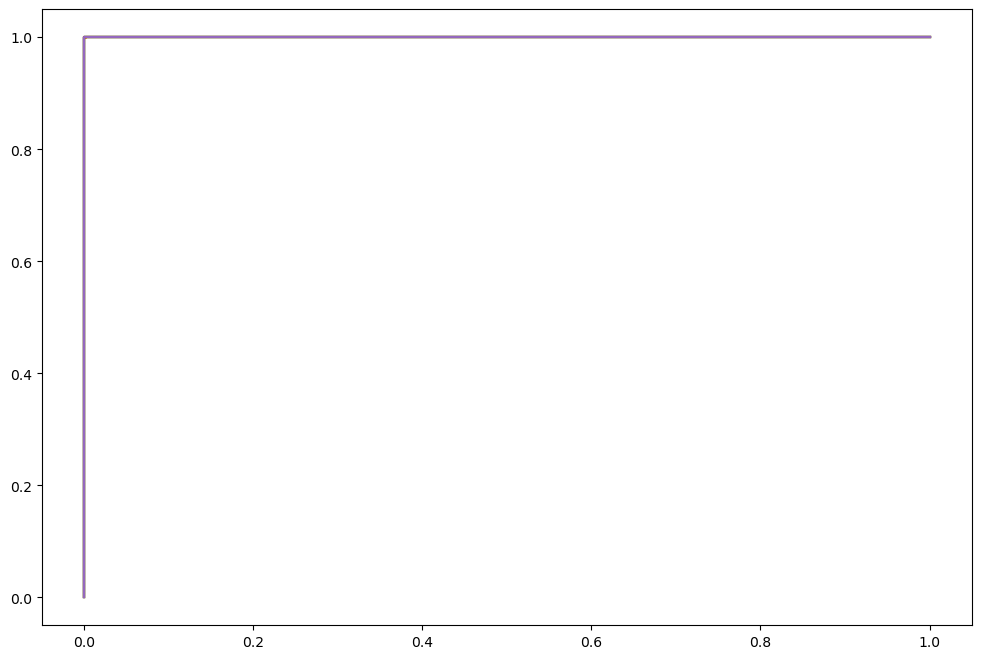

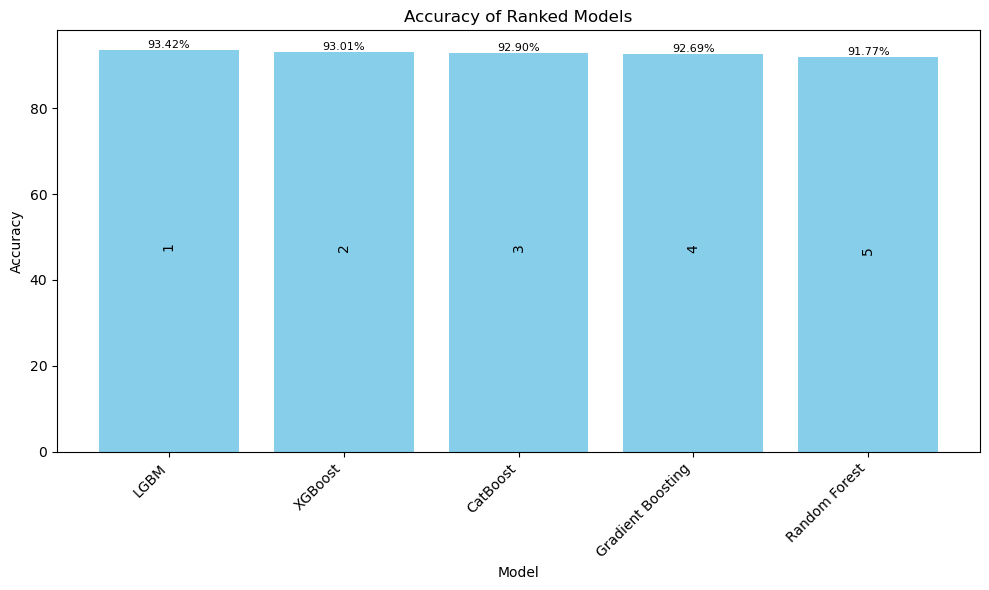

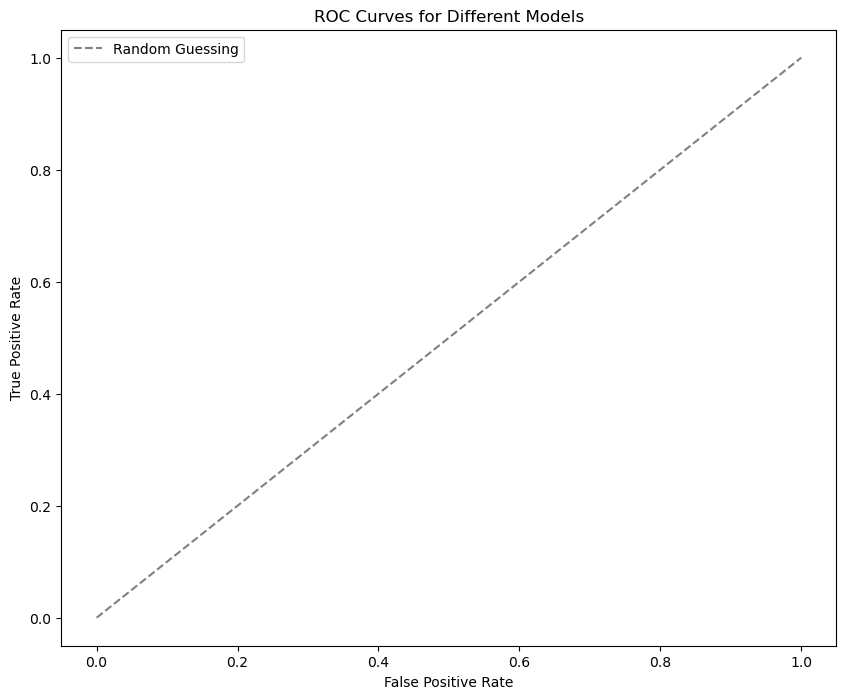

Selected features:
Pregnancies
Glucose
SkinThickness
Insulin
BMI
PDF
Age
Best Parameters for Each Model:

<------------------Random Forest------------------>
Best parameters for Random Forest with 3-Fold Cross-Validation:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 466, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Best parameters for Random Forest with 5-Fold Cross-Validation:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 443, 'n_jobs': None, 'oob_sco

In [ ]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform

# Set random seed for reproducibility
np.random.seed(42)

# Load and preprocess data
# Assuming scaled_features_df and outcome are defined previously

# Apply MinMaxScaler to ensure features are non-negative
scaler = MinMaxScaler()
features_non_negative = scaler.fit_transform(scaled_features_df)

# Apply SelectKBest feature selection using Chi-Square method
k_best = SelectKBest(score_func=chi2, k=7)  # Select top 7 features
features_selected = k_best.fit_transform(features_non_negative, outcome)

# Get the selected feature indices and names
selected_feature_indices = k_best.get_support(indices=True)
selected_feature_names = scaled_features_df.columns[selected_feature_indices]

# Define classifiers with initial parameter settings for RandomizedSearchCV
classifiers = {
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': randint(100, 500),
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': randint(2, 11),
        'min_samples_leaf': randint(1, 5)
    }),
    'XGBoost': (XGBClassifier(), {
        'n_estimators': randint(100, 500),
        'max_depth': randint(3, 10),
        'learning_rate': uniform(0.01, 0.1),
        'subsample': uniform(0.8, 0.2)
    }),
    'Gradient Boosting': (GradientBoostingClassifier(), {
        'n_estimators': randint(100, 500),
        'max_depth': randint(3, 10),
        'learning_rate': uniform(0.01, 0.1),
        'subsample': uniform(0.8, 0.2)
    }),
    'LGBM': (LGBMClassifier(verbose=-1), {
        'n_estimators': randint(100, 500),
        'max_depth': [-1, 10, 20, 30],
        'learning_rate': uniform(0.01, 0.1),
        'num_leaves': randint(31, 100)
    }),
    'CatBoost': (CatBoostClassifier(verbose=0), {
        'iterations': randint(500, 1500),
        'depth': randint(4, 10),
        'learning_rate': uniform(0.01, 0.1)
    })
}

# Define different numbers of folds
fold_settings = [3, 5, 10]

# Initialize dictionaries to store results
results = {}
best_result = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'auc': 0}
best_model = ''

# SMOTETomek
smote_tomek = SMOTETomek(random_state=42)

# Initialize lists to store accuracies and models
accuracy_values = []
model_names = []

# ROC curve initialization
plt.figure(figsize=(12, 8))

# Perform cross-validation for each classifier and fold setting
for clf_name, (clf, param_distributions) in classifiers.items():
    print(f"<--------------------------------------------------{clf_name}-------------------------->")
    results[clf_name] = {}
    best_fold_result = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0, 'auc': 0}
    best_fold = 0
    for folds in fold_settings:
        print(f"<--------------------------------------------------{folds}-Fold-------------------------->")


        # Perform SMOTETomek resampling
        features_resampled, outcome_resampled = smote_tomek.fit_resample(features_selected, outcome)

        # Initialize StratifiedKFold with fixed random state
        skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)

        # Perform RandomizedSearchCV
        randomized_search = RandomizedSearchCV(estimator=clf, param_distributions=param_distributions, n_iter=50, cv=skf,
                                               scoring='accuracy', n_jobs=-1, random_state=42)
        randomized_search.fit(features_resampled, outcome_resampled)

        # Get the best estimator
        best_estimator = randomized_search.best_estimator_

        # Perform cross-validation with the best estimator
        cv_results = cross_validate(best_estimator, features_resampled, outcome_resampled, cv=skf,
                                    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                                    return_train_score=False)

        # Extract evaluation metrics
        mean_accuracy = cv_results['test_accuracy'].mean()
        mean_precision = cv_results['test_precision'].mean()
        mean_recall = cv_results['test_recall'].mean()
        mean_f1 = cv_results['test_f1'].mean()
        mean_auc = cv_results['test_roc_auc'].mean()

        # Store results
        results[clf_name][folds] = {'accuracy': mean_accuracy,
                                    'precision': mean_precision,
                                    'recall': mean_recall,
                                    'f1': mean_f1,
                                    'auc': mean_auc,
                                    'best_estimator': best_estimator}

        # Check if current fold setting yields the best result for this classifier
        if mean_accuracy > best_result['accuracy']:
            best_result = {'accuracy': mean_accuracy,
                           'precision': mean_precision,
                           'recall': mean_recall,
                           'f1': mean_f1,
                           'auc': mean_auc}
            best_model = clf_name

        # Check if current fold is the best fold for this classifier
        if mean_accuracy > best_fold_result['accuracy']:
            best_fold_result = {'accuracy': mean_accuracy,
                                'precision': mean_precision,
                                'recall': mean_recall,
                                'f1': mean_f1,
                                'auc': mean_auc}
            best_fold = folds

        # Print results for the current fold setting
        print(f"{folds}-Fold Cross-Validation:")
        print("Mean Accuracy: {:.2f}%".format(mean_accuracy * 100))
        print("Mean Precision: {:.2f}%".format(mean_precision * 100))
        print("Mean Recall: {:.2f}%".format(mean_recall * 100))
        print("Mean F1 Score: {:.2f}%".format(mean_f1 * 100))
        print("Mean AUC: {:.2f}%".format(mean_auc * 100))
        print(f"Time taken: {int(fold_execution_time // 60)} min {int(fold_execution_time % 60)} sec")
        print()

        # Append accuracy value and model name for plotting
        accuracy_values.append(mean_accuracy)
        model_names.append(clf_name)


# Print the best performing model and its result
print("<-----------------------------------Best Performing Model----------------------------------->")
print(f"Best performing model: {best_model}")
print("Best result:")
print(f"Mean Accuracy: {best_result['accuracy'] * 100:.2f}%")
print(f"Mean Precision: {best_result['precision'] * 100:.2f}%")
print(f"Mean Recall: {best_result['recall'] * 100:.2f}%")
print(f"Mean F1 Score: {best_result['f1'] * 100:.2f}%")
print(f"Mean AUC: {best_result['auc'] * 100:.2f}%")

# Plot the comparison graph based on accuracy for the ranked models
plt.figure(figsize=(10, 6))
bars = plt.bar(ranked_model_names, ranked_accuracy_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Ranked Models')
for i in range(len(ranked_model_names)):
    plt.text(i, ranked_accuracy_values[i], f'{ranked_accuracy_values[i]:.2f}%', ha='center', va='bottom', fontsize=8)
    plt.text(i, ranked_accuracy_values[i] / 2, f'{i+1}', ha='center', va='bottom', color='black', rotation=90)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Selected features:")
for feature in selected_feature_names:
    print(feature)

